#### House price prediction


In [4]:
import pandas as pd
df = pd.read_csv('house_data.csv')
print(df.head())
print(df.info())
print(df.describe())
missing_values = (df.isnull().sum())
print(missing_values[missing_values > 0])

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']]
y = df[['price']]
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print("Training data size:", len(x_train))
print("Testing data size:", len(x_test))

Training data size: 3220
Testing data size: 1380


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=42)
model3 = RandomForestRegressor(random_state=42)

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

print("All models trained successfully.")

c:\Users\mps\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


All models trained successfully.


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
# make prediction on training data
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)
# calculate the accuracy R^2 score
r2_1 = r2_score(y_test , pred1)
r2_2 = r2_score(y_test , pred2)
r2_3 = r2_score(y_test , pred3)

print("Linear Regression R² Score:", r2_1)
print("Decision Tree R² Score:", r2_2)
print("Random Forest R² Score:", r2_3)

if r2_1 > r2_2 and r2_1 > r2_3:
    print("Linear Regression is the best model.")
elif r2_2 > r2_1 and r2_2 > r2_3:
    print("Decision Tree is the best model.")
else:
    print("Random Forest is the best model.")


Linear Regression R² Score: 0.05464636220929331
Decision Tree R² Score: -0.07241686812224302
Random Forest R² Score: 0.04252525043572386
Linear Regression is the best model.


In [14]:
# Remove houses with price = 0
df_clean = df[df['price'] > 0]

print("Original rows:", len(df))
print("After cleaning:", len(df_clean))

Original rows: 4600
After cleaning: 4551


In [15]:
# Use cleaned data
X = df_clean[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'yr_built']]
y = df_clean['price']

# Split data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))

Training data size: 3185
Testing data size: 1366


In [17]:
# Create the 3 models
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=42)
model3 = RandomForestRegressor(random_state=42)

# Train all 3 on CLEAN training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

print("All 3 models trained on clean data!")

All 3 models trained on clean data!


In [20]:
# Evaluate the models again on the clean test data

from sklearn.metrics import mean_squared_error, r2_score
# make prediction on training data
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
# calculate the accuracy R^2 score
r2_1 = r2_score(y_test , pred1)
r2_2 = r2_score(y_test , pred2)
r2_3 = r2_score(y_test , pred3)

print("Linear Regression R² Score:", r2_1)
print("Decision Tree R² Score:", r2_2)
print("Random Forest R² Score:", r2_3)

if r2_1 > r2_2 and r2_1 > r2_3:
    print("Linear Regression is the best model.")
elif r2_2 > r2_1 and r2_2 > r2_3:
    print("Decision Tree is the best model.")
else:
    print("Random Forest is the best model.")

Linear Regression R² Score: 0.5484995711504232
Decision Tree R² Score: -0.061658469279079586
Random Forest R² Score: 0.44556246092353813
Linear Regression is the best model.


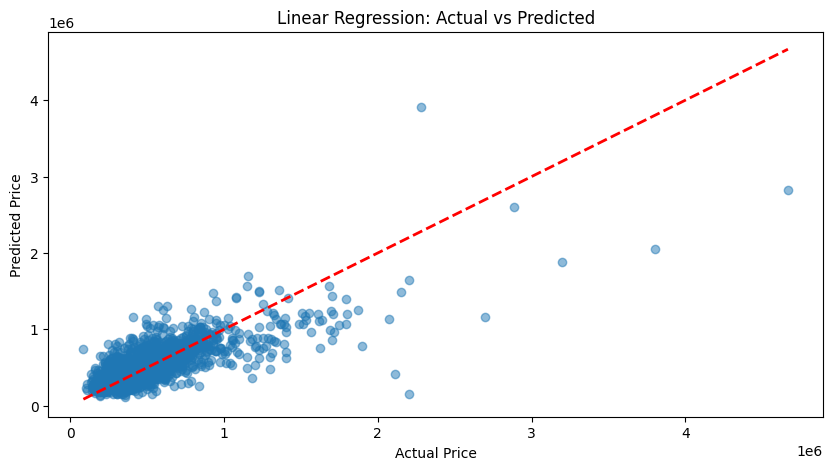

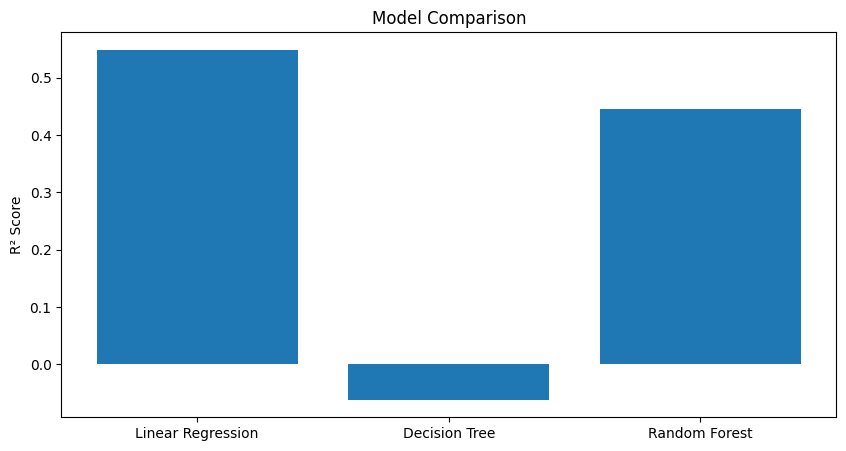

In [21]:
import matplotlib.pyplot as plt

# Graph 1: Actual vs Predicted (Linear Regression)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, pred1, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Graph 2: Model Comparison
plt.figure(figsize=(10, 5))
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
scores = [r2_1, r2_2, r2_3]
plt.bar(models, scores)
plt.ylabel('R² Score')
plt.title('Model Comparison')
plt.show()